## Police Killings

The Guardian launched “The Counted,” an impressive interactive database of Americans killed by police since the start of the year. It started in 2015, but you can check the recent stats for 2016. We will explore the data by race, income and state.

### Assignment

- Import the data and examine the head and columns
- Get the total counts for each racial grouping
- Find the relative % for each racial grouping
- How do the killings compare with the overall US breakdown of population by race?

In [1]:
% matplotlib inline

In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd

In [3]:
pk = pd.read_csv("police_killings.csv", encoding = "ISO-8859-1")
print(pk.head())
print(pk.columns)

                 name age gender    raceethnicity     month  day  year  \
0  A'donte Washington  16   Male            Black  February   23  2015   
1      Aaron Rutledge  27   Male            White     April    2  2015   
2         Aaron Siler  26   Male            White     March   14  2015   
3        Aaron Valdez  25   Male  Hispanic/Latino     March   11  2015   
4        Adam Jovicic  29   Male            White     March   19  2015   

            streetaddress          city state    ...     share_hispanic  \
0            Clearview Ln     Millbrook    AL    ...                5.6   
1  300 block Iris Park Dr     Pineville    LA    ...                0.5   
2    22nd Ave and 56th St       Kenosha    WI    ...               16.8   
3       3000 Seminole Ave    South Gate    CA    ...               98.8   
4          364 Hiwood Ave  Munroe Falls    OH    ...                1.7   

   p_income  h_income  county_income  comp_income  county_bucket  nat_bucket  \
0     28375   51367.0   

In [4]:
# total counts for each racial grouping
vc = pk["raceethnicity"].value_counts()
print(vc)

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


In [5]:
# relative percentage for each racial grouping
tot_rec = pk["raceethnicity"].count()
race_ls = list(vc.index)
per_kbp = []
for i in range(6):
    per_kbp.append((vc[i]/tot_rec)*100)
    print(race_ls[i], (vc[i]/tot_rec)*100)    

White 50.53533190578159
Black 28.90792291220557
Hispanic/Latino 14.346895074946467
Unknown 3.2119914346895073
Asian/Pacific Islander 2.141327623126338
Native American 0.8565310492505354


In [6]:
# How do the killings compare with the overall US breakdown of population by race?  Data 
dic_per = {"% killed by police": per_kbp, "% of total US pop": pd.Series([60.7, 13.4, 18.1, 0, 0.2, 1.3], index = race_ls)}
df = pd.DataFrame(dic_per)
print(df)
print()
print("US population percentages taken from https://www.census.gov/quickfacts/fact/table/US/PST045217")


                        % killed by police  % of total US pop
White                            50.535332               60.7
Black                            28.907923               13.4
Hispanic/Latino                  14.346895               18.1
Unknown                           3.211991                0.0
Asian/Pacific Islander            2.141328                0.2
Native American                   0.856531                1.3

US population percentages taken from https://www.census.gov/quickfacts/fact/table/US/PST045217


## How do the killings compare with the overall US breakdown of population by race?  Interpretation

The percentage of black people killed by police is twice that of their representation in the US population, while the percentage of Asian/Pacifica Islanders killed by police is 10x.  The percentage of Native Americans, Whites, and Hispanic/Latinos killed by police is below their repreentation in the general US population.   

### Assignment

- Graph the killings by race using a bar chart. Make sure to label the graph and axes
- Graph the killings by "p_income" using a histogram with different bin amounts (remember to remove any "-" values)
- Calculate the median "p_income"

Text(0.5,0,'Number of people killed')

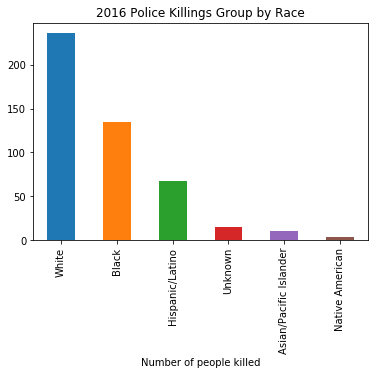

In [7]:
#Graph the killings by race using a bar chart. Make sure to label the graph and axes

ax = vc.plot(kind="bar", title="2016 Police Killings Group by Race")
ax.set_xlabel("Race/Ethnicity")
ax.set_xlabel("Number of people killed")

Text(0.5,0,'Annual Income ($)')

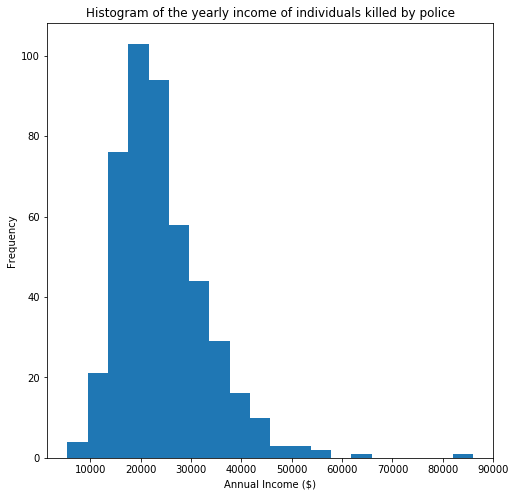

In [8]:
#Graph the killings by "p_income" using a histogram with different bin amounts (remember to remove any "-" values)
missing = np.where(pk["p_income"]=="-")
clean_pk = pk.drop(pk.index[missing])
p_income = pd.to_numeric(clean_pk["p_income"])
ax = p_income.plot(kind="hist", bins=20, figsize=(8,8), title="Histogram of the yearly income of individuals killed by police")
ax.set_xlabel("Annual Income ($)")

In [9]:
#Calculate the median "p_income"
print("Median income:  $", p_income.median())

Median income:  $ 22348.0


### Assignment

- Find the total killings per each state
- Create a new dataframe and remove any "-" from the following columns "share_white", "share_black" and "share_hispanic" 
- Convert the values in those columns to float types
- Find the mean of 'pop', 'county_income' and those 3 columns for the following subsets
    
    lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
    
    highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

In [10]:
#Find the total killings per each state
clean_pk["state"].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
NJ    11
WA    11
IL    11
LA    10
MD    10
NC    10
MO    10
OH     9
VA     9
SC     9
MI     9
AL     8
IN     8
OR     8
KY     7
PA     7
MS     6
KS     6
MN     6
NE     6
TN     6
MA     5
NM     5
UT     5
WI     5
HI     4
ID     4
AR     4
NV     3
MT     2
DE     2
IA     2
AK     2
WV     2
DC     1
ME     1
NH     1
CT     1
WY     1
Name: state, dtype: int64

In [11]:
#Create a new dataframe and remove any "-" from the following columns "share_white", "share_black" and "share_hispanic"
#Convert the values in those columns to float types
clean_pk["share_white"] = clean_pk["share_white"].astype(float)
clean_pk["share_black"] = clean_pk["share_black"].astype(float)
clean_pk["share_hispanic"] = clean_pk["share_hispanic"].astype(float)

In [22]:
#Find the mean of 'pop', 'county_income' and those 3 columns for the following subsets
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]
col_of_i = ["state", "pop", "county_income", "share_white", "share_black", "share_hispanic"]

low_pk = clean_pk.loc[clean_pk["state"].isin(lowest_states)]


high_pk = clean_pk.loc[clean_pk["state"].isin(highest_states)]

low_pk_col = low_pk[col_of_i]

high_pk_col = high_pk[col_of_i]

low_pk_col.pivot_table(columns="state", aggfunc=np.mean)


state,CT,IA,IL,MA,ME,NH,NY,OH,PA,WI
county_income,61996.0,50734.50,55104.363636,69259.00,37855.0,77348.0,55594.428571,46059.444444,54253.714286,53356.60
pop,4066.0,4076.00,3379.818182,4398.40,3045.0,4521.0,4865.714286,3741.666667,4400.285714,4748.40
share_black,2.1,14.05,30.354545,16.04,0.3,1.8,25.842857,27.322222,16.157143,4.64
share_hispanic,8.8,19.50,15.154545,9.08,0.6,1.9,18.207143,1.900000,18.671429,12.00
share_white,76.8,60.90,50.209091,72.10,97.2,94.0,47.571429,67.177778,61.557143,78.08


In [16]:
high_pk_col.pivot_table(columns="state", aggfunc=np.mean)

state,AK,AZ,CO,DE,HI,ID,LA,NE,NM,OK
county_income,77454.00,48391.000,53060.500000,59843.00,64707.500,45349.250,42763.90,51607.333333,47309.40,42994.954545
pop,4176.00,4467.120,4103.250000,9020.50,3466.750,7426.250,2902.80,4034.666667,5273.20,3934.772727
share_black,11.40,3.652,8.333333,35.10,5.475,0.600,49.71,8.650000,0.98,9.022727
share_hispanic,11.90,34.444,30.883333,4.15,5.050,8.725,7.86,10.300000,39.02,11.336364
share_white,37.95,51.580,56.625000,52.25,33.800,85.575,38.59,75.800000,55.66,62.459091
